# Group 7 Project - Machine Learning

**Abdul Aziz Mohammed – 2215231** 

**Ashwitha Reddy Nimmala – 23137828**

**FNU Syed Sohaib Ali - 22098098** 

**Neeraj Vasanthapu - 2216992**

**Importing Essential Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

**Reading the Dataset**

In [2]:
data = pd.read_csv("C:/Users/ssoha/OneDrive/Desktop/Data Science/Machine Learning/weatherHistory/weatherHistory.csv")

In [3]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
# Displaying basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB
None


In [5]:
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [6]:
data.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,0,1016.16,Partly cloudy starting in the morning.


In [7]:
print('Rows: ', data.shape[0])
print('Columns: ', data.shape[1])
print('\n Features: \n', data.columns.tolist())
print('\n Unique: \n', data.nunique())

Rows:  96453
Columns:  12

 Features: 
 ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']

 Unique: 
 Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


In [8]:
data.shape

(96453, 12)

In [9]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


**Data Cleaning & Preprocessing**

Handling Missing Values

In [10]:
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [11]:
data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)

In [12]:
# Checking for missing values again
print("Missing values:\n", data.isnull().sum())

Missing values:
 Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


C:\Users\ssoha\AppData\Local\Temp\ipykernel_25160\3817701924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


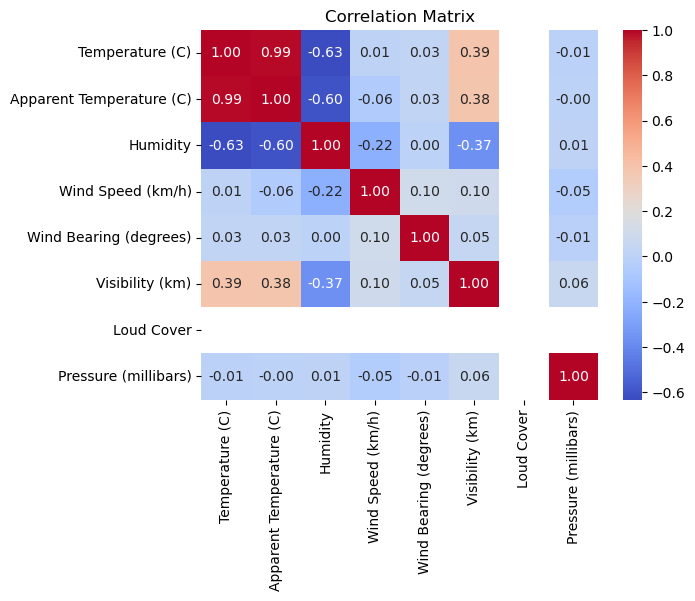

In [13]:
# Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Droppin Unwanted Columns

In [14]:
# Dropping unnecessary columns
columns_to_drop = ['Loud Cover']                                   
data = data.drop(columns=columns_to_drop, axis=1)

Removing Duplicates 

In [15]:
# Checking for duplicates
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 24


In [16]:
# Removing duplicates
data = data.drop_duplicates()

In [17]:
# Checking for duplicates again
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


Data Formatting

In [18]:
# Verifying changes
print(data.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [19]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [20]:
# Converting 'Formatted Date' to datetime format
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

In [21]:
data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96429, dtype: datetime64[ns, UTC]

In [22]:
print(data.dtypes)

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object


In [23]:
# Summary statistics
print("Summary statistics:\n", data.describe())

Summary statistics:
        Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96429.000000              96429.000000  96429.000000   
mean         11.929692                 10.851707      0.734902   
std           9.550492                 10.695743      0.195466   
min         -21.822222                -27.716667      0.000000   
25%           4.683333                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       96429.000000            96429.000000     96429.000000   
mean           10.812460              187.497506        10.347225   
std             6.913345              107.376423         4.192548   
min             0.000000                0.000000         0.000000   
25%             5.828200              1

**Exploratory Data Analysis**

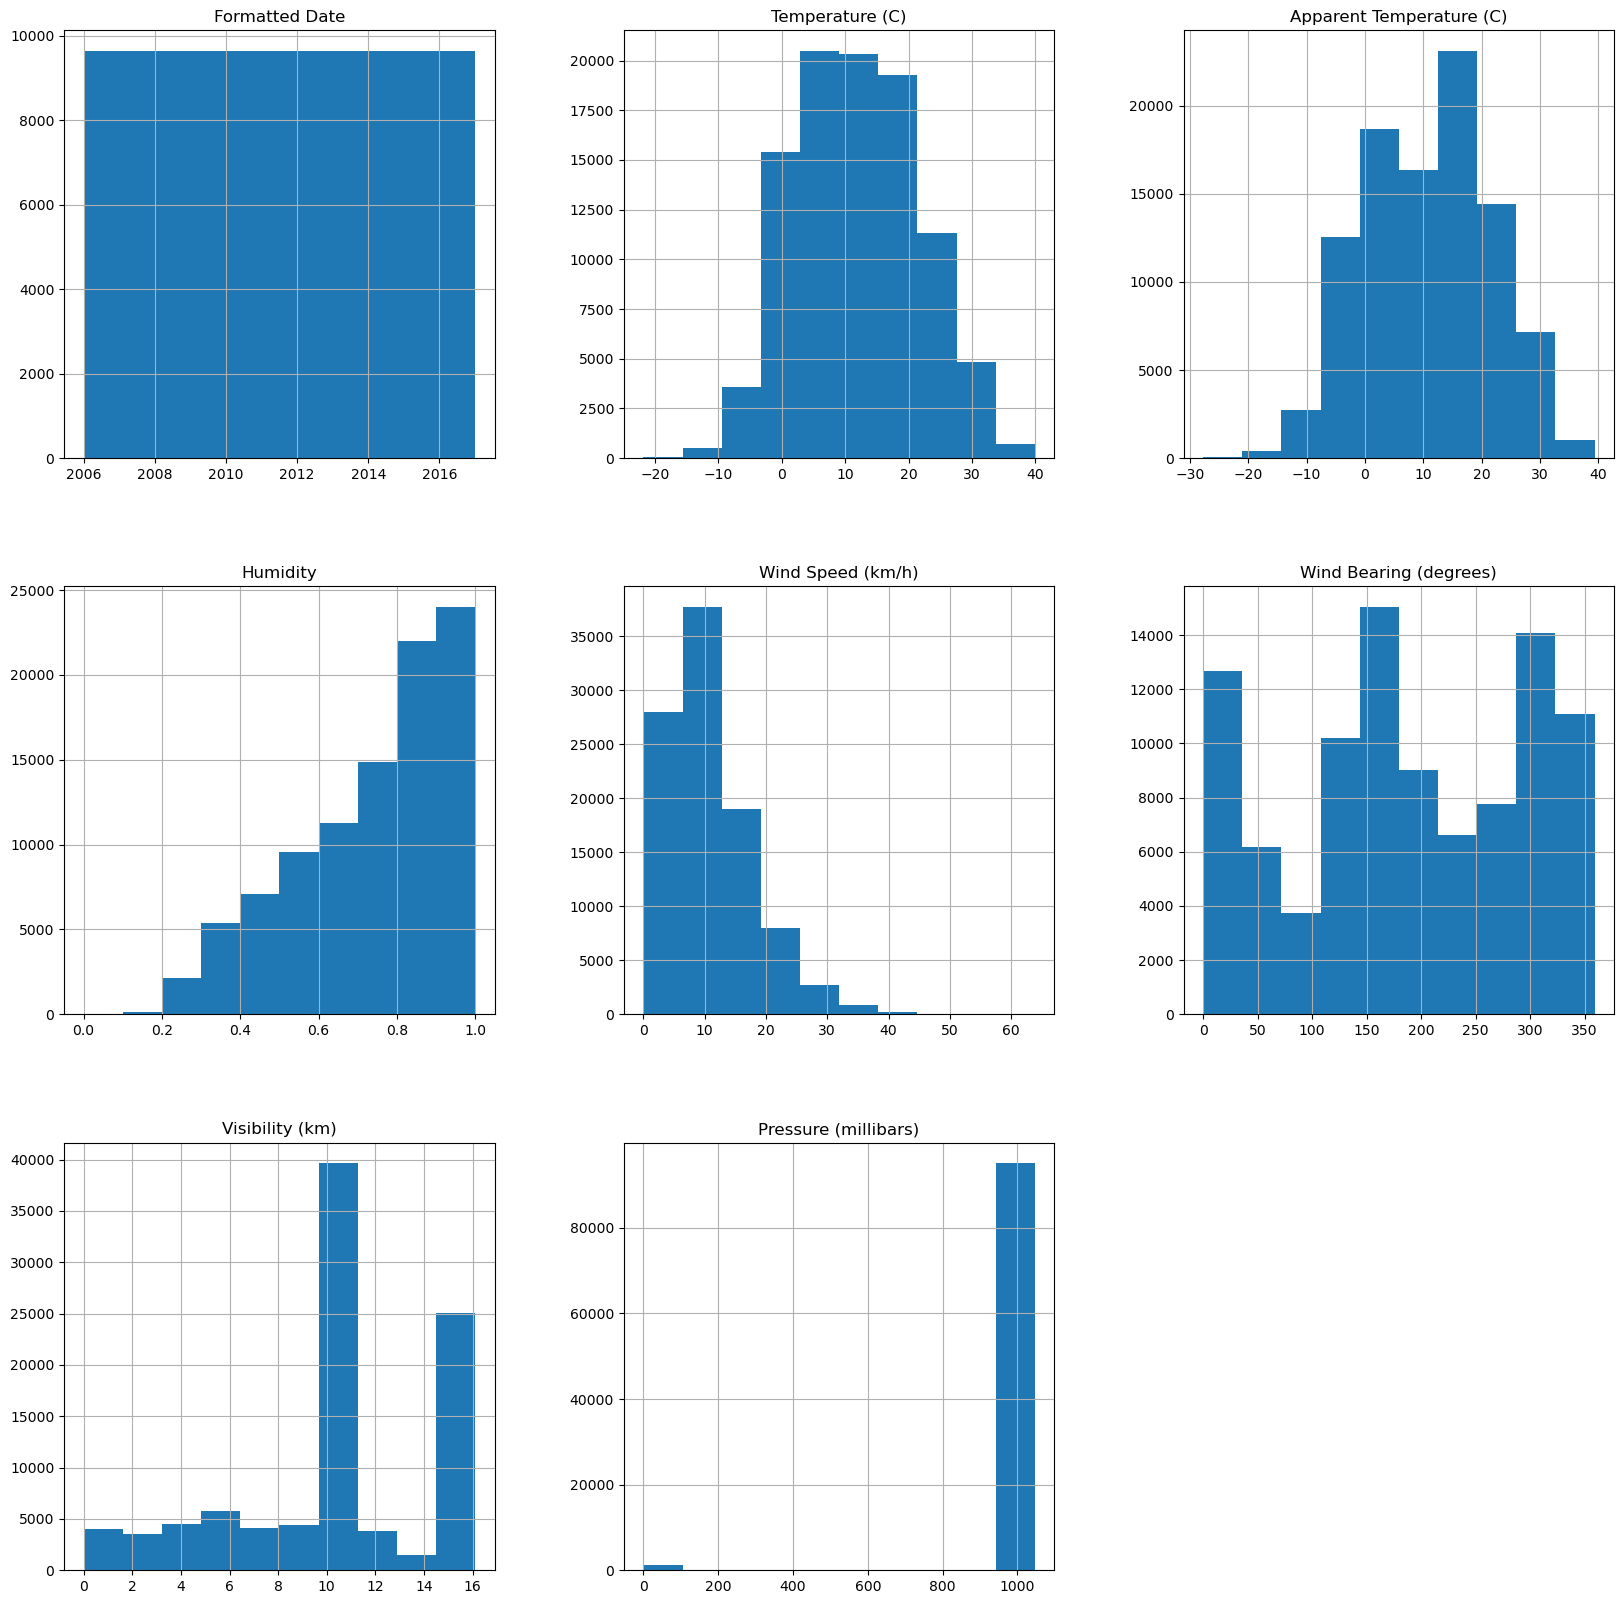

In [24]:
data.hist(figsize=(20,20));

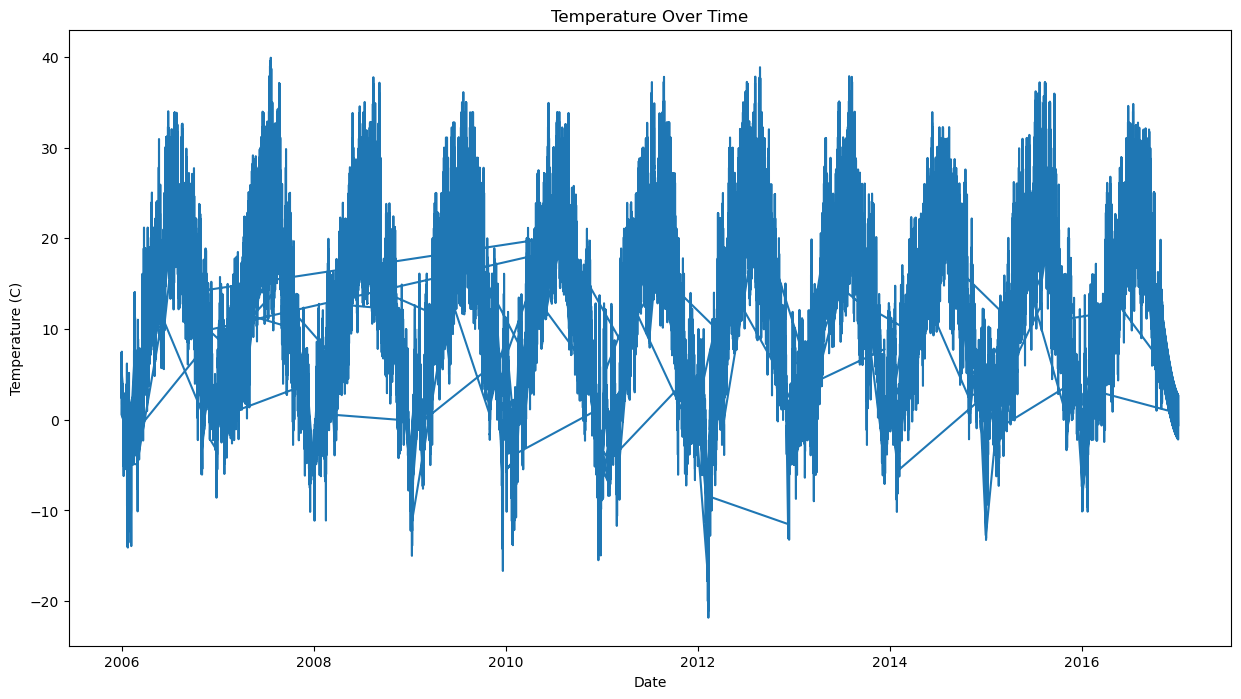

In [25]:
# Time Series Analysis - Temperature over time
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
plt.figure(figsize=(15, 8))
plt.plot(data['Formatted Date'], data['Temperature (C)'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

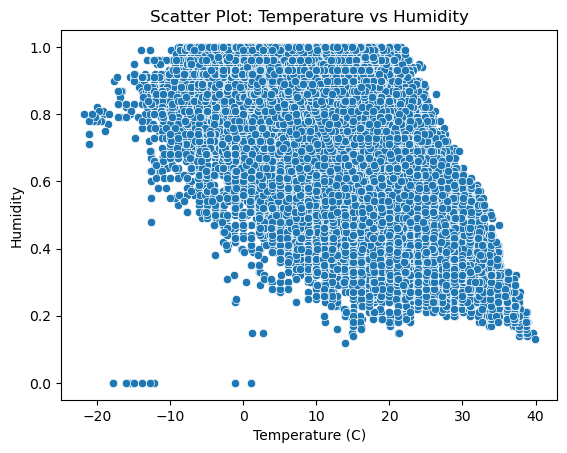

In [26]:
# Bivariate Analysis - Scatter Plot
sns.scatterplot(x='Temperature (C)', y='Humidity', data=data)
plt.title('Scatter Plot: Temperature vs Humidity')
plt.show()

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

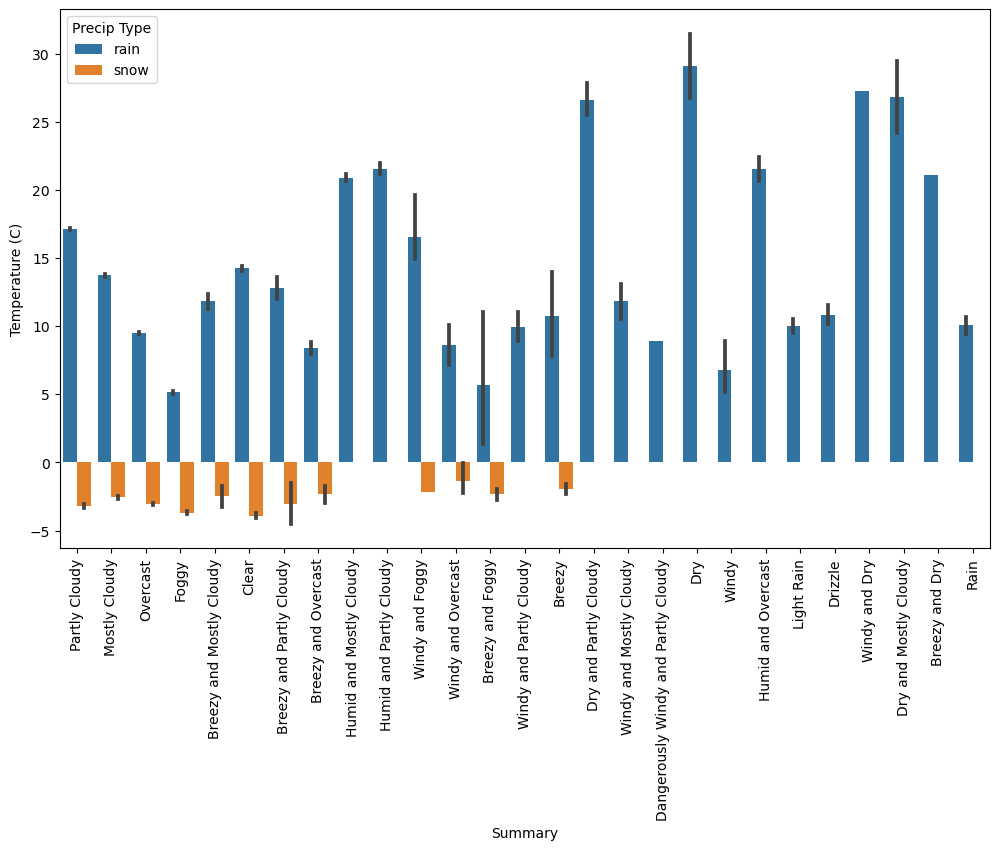

In [27]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=data, x="Summary", y="Temperature (C)",hue="Precip Type")

<Axes: xlabel='Summary', ylabel='Pressure (millibars)'>

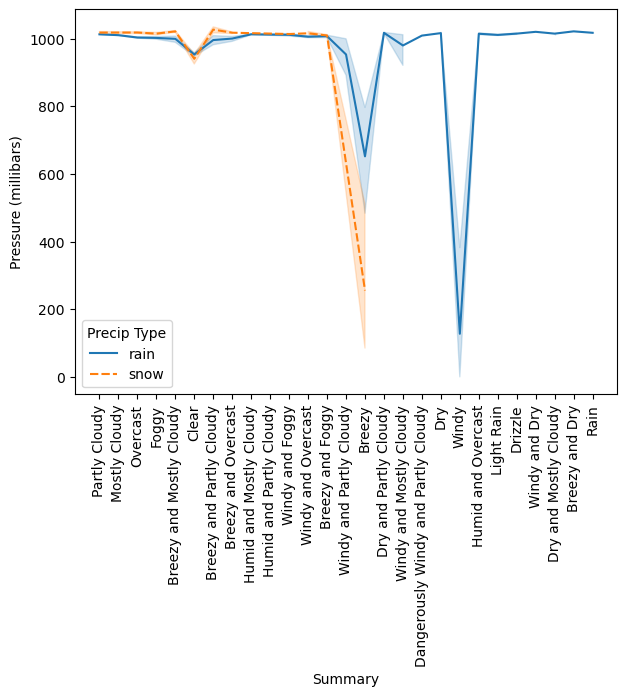

In [28]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.lineplot(data=data, x="Summary", y="Pressure (millibars)", hue="Precip Type", style="Precip Type")

C:\Users\ssoha\AppData\Local\Temp\ipykernel_25160\3817701924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


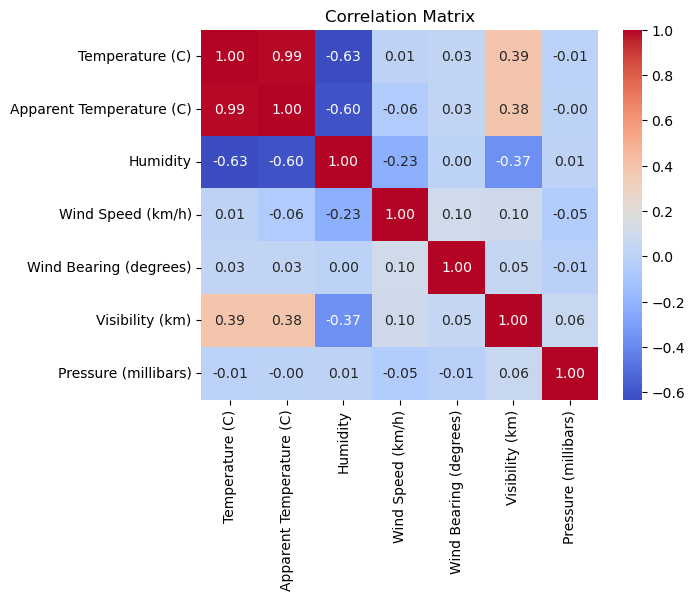

In [29]:
# Correlation Matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

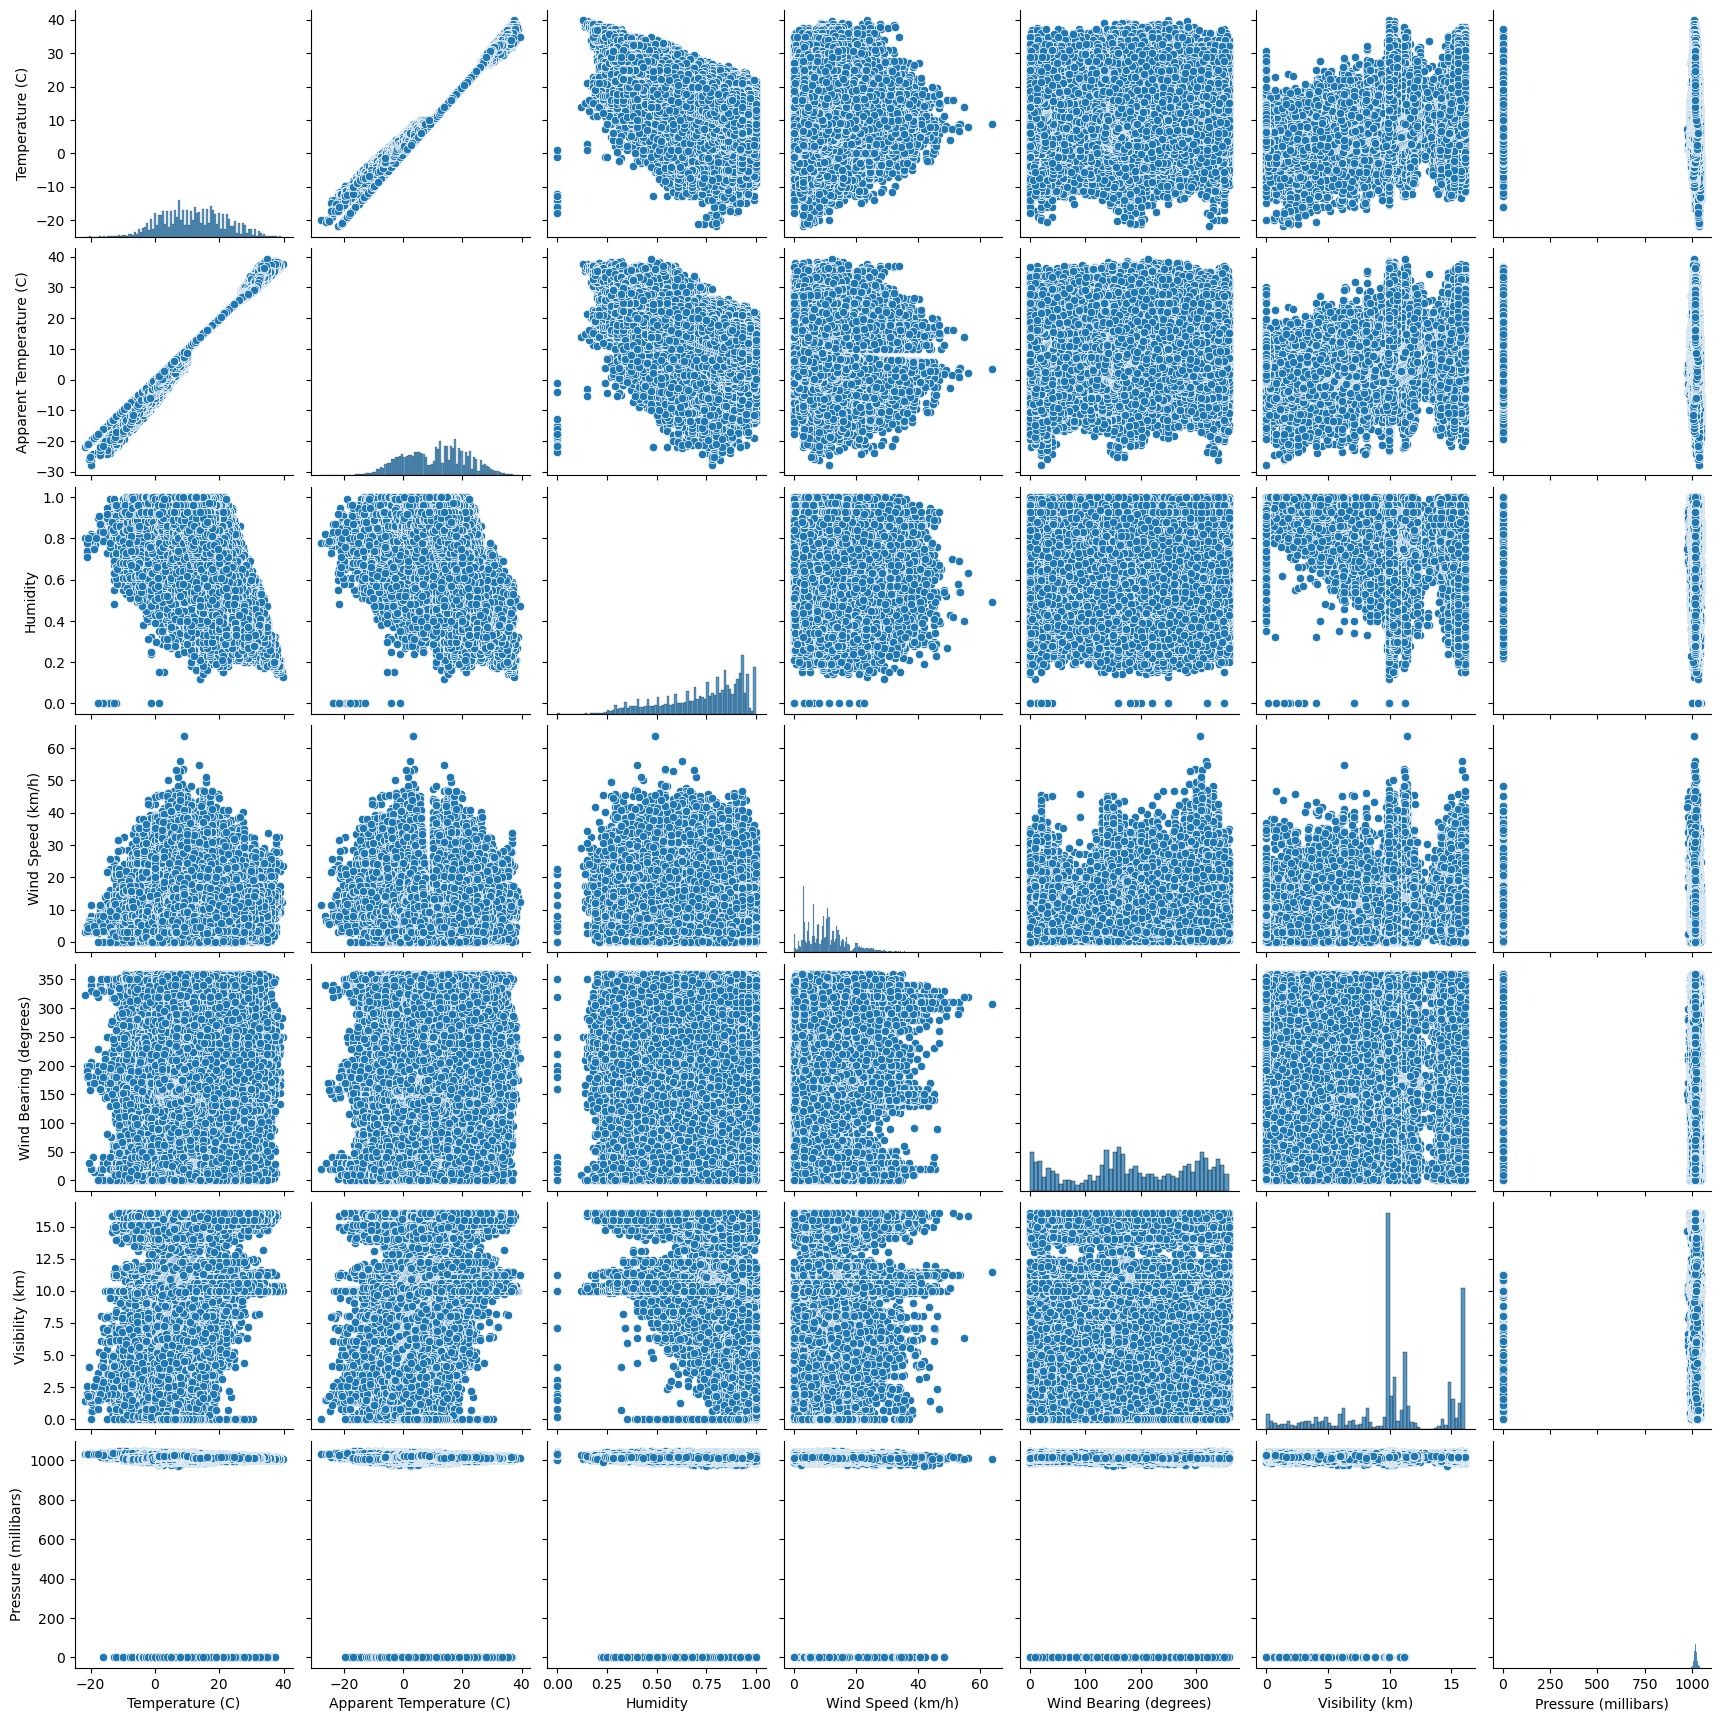

In [30]:
# Pair Plot
sns.pairplot(data)
plt.show()

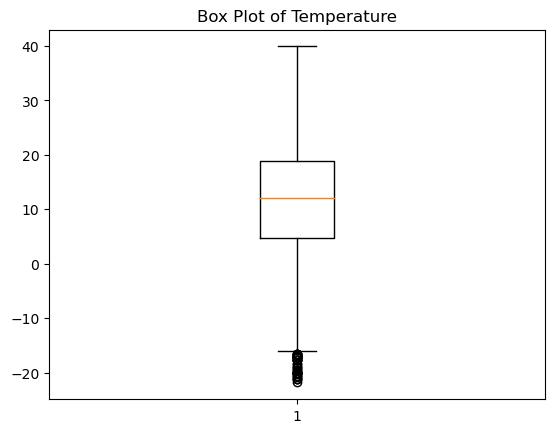

In [31]:
# Box plot for Temperature to identify outliers
plt.boxplot(data['Temperature (C)'])
plt.title('Box Plot of Temperature')
plt.show()

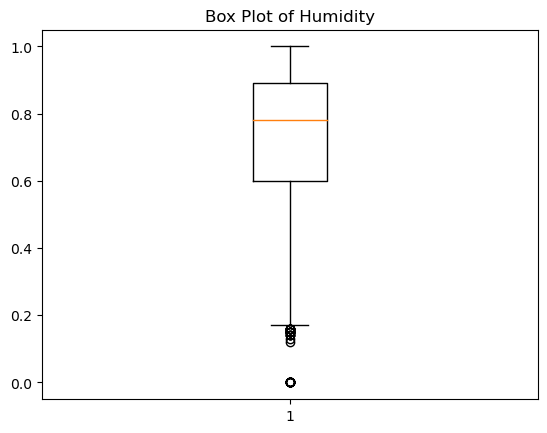

In [32]:
# Box plot for Temperature to identify outliers
plt.boxplot(data['Humidity'])
plt.title('Box Plot of Humidity')
plt.show()

**Removing Outliers Using Inter Quantile Range**

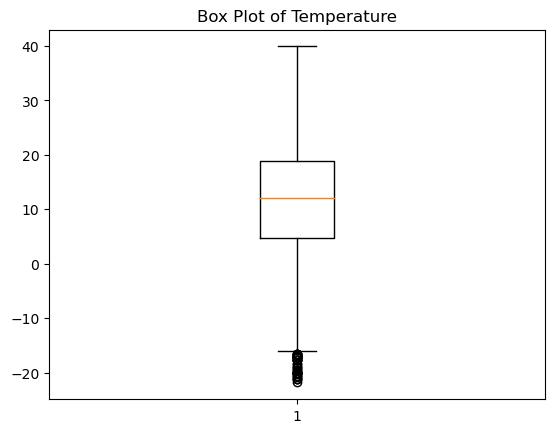

In [33]:
# Box plot for Temperature to identify outliers
plt.boxplot(data['Temperature (C)'])
plt.title('Box Plot of Temperature')
plt.show()

In [34]:
#Outlier detection and handling (using IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Keeping only rows without outliers
data_cleaned = data[~((data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
                      (data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\ssoha\AppData\Local\Temp\ipykernel_25160\3744918431.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\ssoha\AppData\Local\Temp\ipykernel_25160\3744918431.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [37]:
data_cleaned.to_csv('C:/Users/ssoha/OneDrive/Desktop/Data Science/Machine Learning/weatherHistory/Cleaned_Data.csv', index=False)


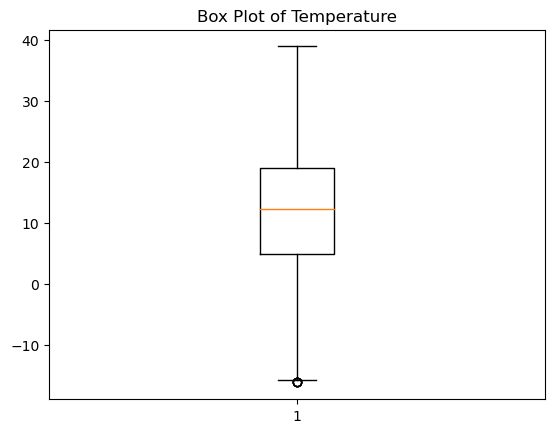

In [35]:
# Box plot for Temperature to identify outliers
plt.boxplot(data_cleaned['Temperature (C)'])
plt.title('Box Plot of Temperature')
plt.show()

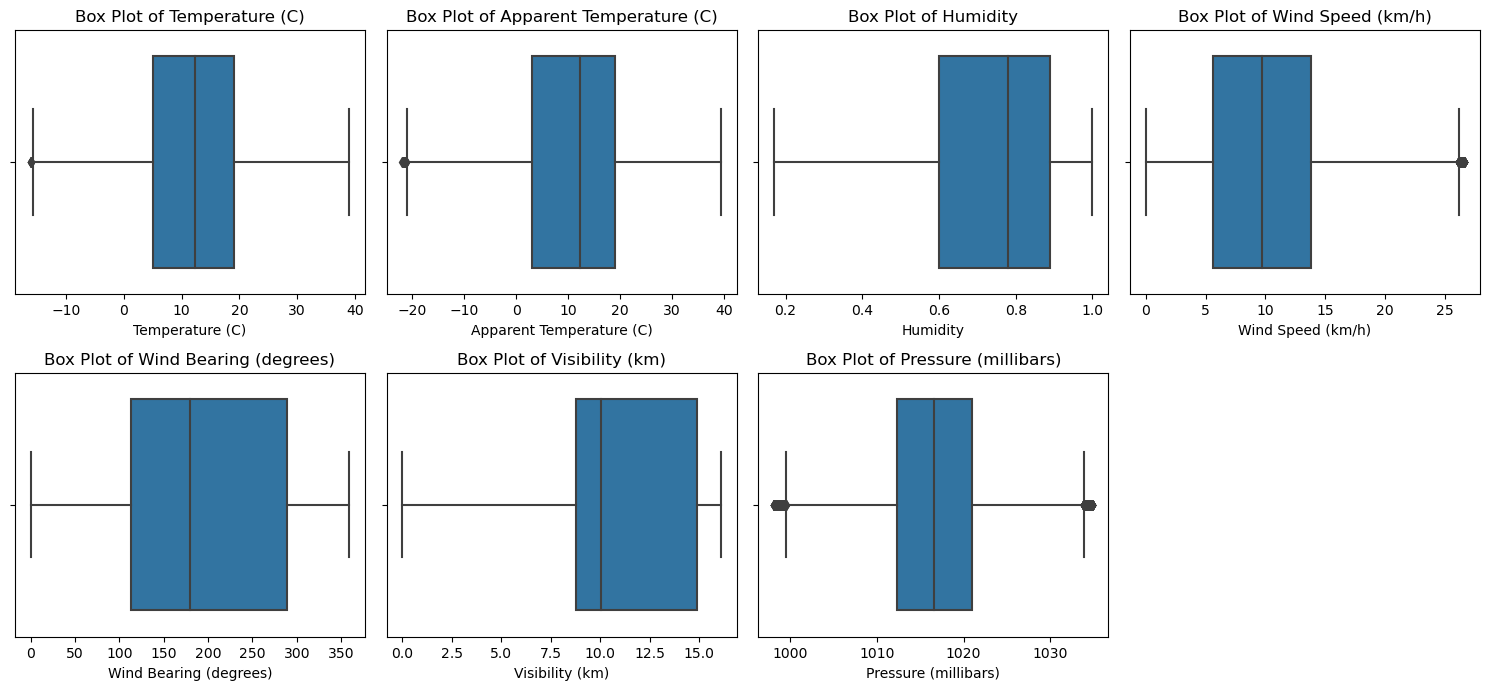

In [36]:
# Box plots for numerical variables
numerical_cols = data_cleaned.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

C:\Users\ssoha\AppData\Local\Temp\ipykernel_24780\3085469767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Temperature (C)'], kde=True, )


<Axes: xlabel='Temperature (C)', ylabel='Density'>

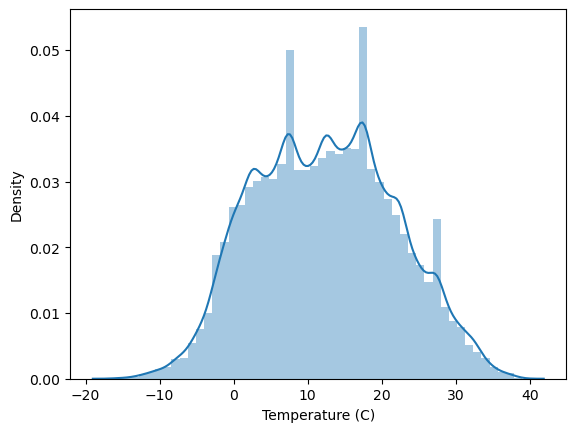

In [37]:
sns.distplot(data_cleaned['Temperature (C)'], kde=True, )

C:\Users\ssoha\AppData\Local\Temp\ipykernel_24780\477700511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Apparent Temperature (C)'], kde=True, )


<Axes: xlabel='Apparent Temperature (C)', ylabel='Density'>

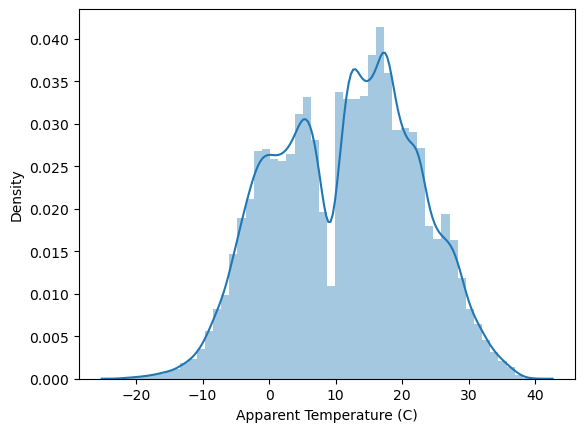

In [38]:
sns.distplot(data_cleaned['Apparent Temperature (C)'], kde=True, )

In [39]:
data_cleaned

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.


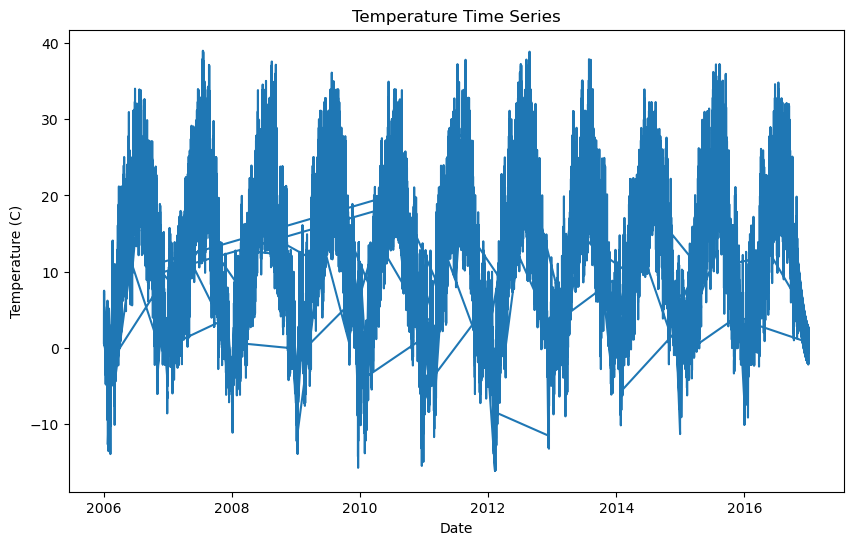

In [40]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Formatted Date'], data_cleaned['Temperature (C)'])
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

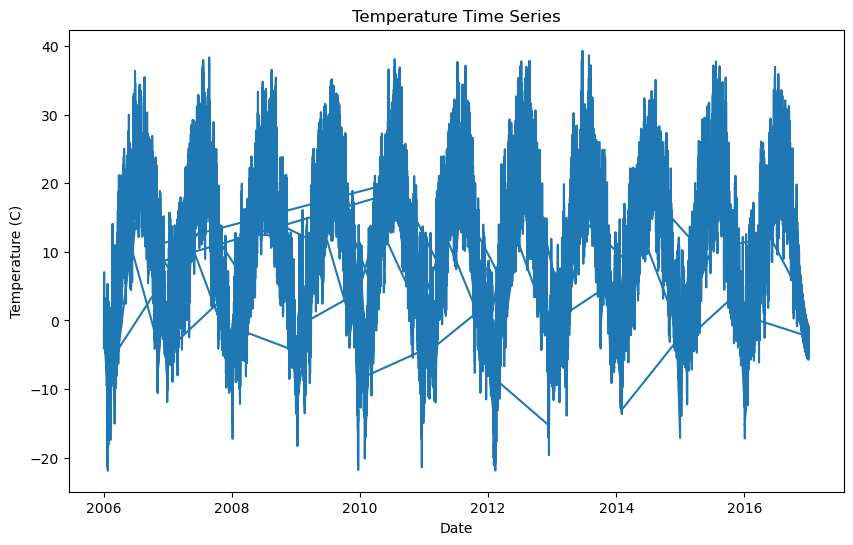

In [41]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Formatted Date'], data_cleaned['Apparent Temperature (C)'])
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

### Weather forecasting

**LSTM:**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [55]:
# Selecting the feature to predict
temperature = data_cleaned['Temperature (C)'].values.reshape(-1, 1)


In [56]:
# Normalizing the feature
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature)


In [57]:
# Splitting into training and testing sets
split_point = int(len(temperature_scaled) * 0.8)
train, test = temperature_scaled[:split_point], temperature_scaled[split_point:]


In [58]:
# Converting an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [59]:
# Reshaping input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [60]:
# Creating and fitting the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)


Epoch 1/5
71396/71396 - 106s - loss: 0.0017 - 106s/epoch - 1ms/step
Epoch 2/5
71396/71396 - 119s - loss: 9.6976e-04 - 119s/epoch - 2ms/step
Epoch 3/5
71396/71396 - 102s - loss: 9.6906e-04 - 102s/epoch - 1ms/step
Epoch 4/5
71396/71396 - 104s - loss: 9.6647e-04 - 104s/epoch - 1ms/step
Epoch 5/5
71396/71396 - 107s - loss: 9.6427e-04 - 107s/epoch - 2ms/step


In [61]:
# Making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


558/558 [==============================] - 1s 1ms/step


In [62]:
# Calculating error scores
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print(f'Train Score: {trainScore:.2f} MSE')
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print(f'Train Score: {trainScore:.2f} MAE')
testScore = mean_squared_error(testY[0], testPredict[:,0])
print(f'Test Score: {testScore:.2f} MSE')
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print(f'Test Score: {testScore:.2f} MAE')
testScore = r2_score(testY[0], testPredict[:,0])
print(f'Test Score: {testScore:.2f} R^2')


Train Score: 2.79 MSE
Train Score: 1.12 MAE
Test Score: 2.00 MSE
Test Score: 0.97 MAE
Test Score: 0.97 R^2


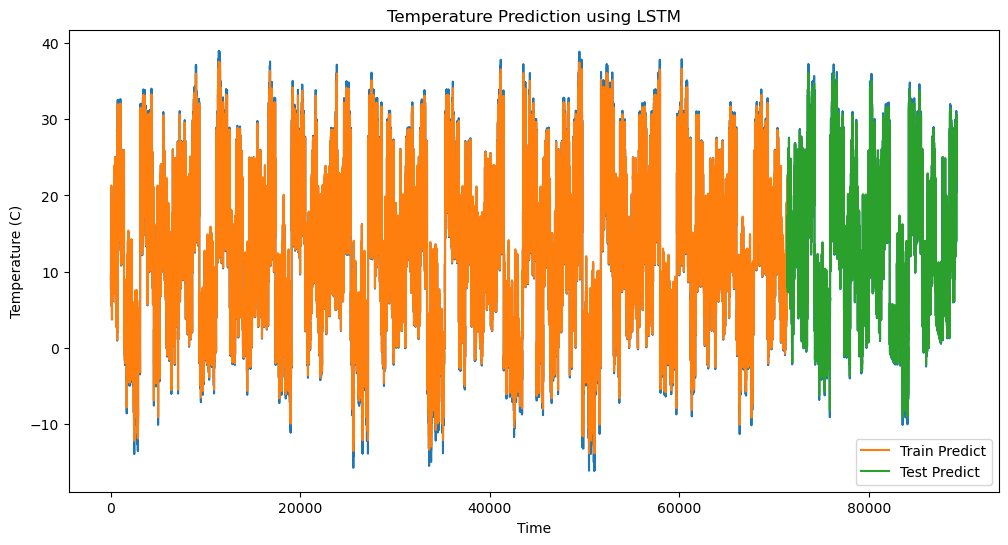

In [63]:
# Plotting baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(temperature_scaled))
plt.plot(np.arange(look_back, look_back+len(trainPredict)), trainPredict, label='Train Predict')
plt.plot(np.arange(look_back+len(trainPredict)+look_back*2+1, len(temperature)+look_back-1), testPredict, label='Test Predict')
plt.title('Temperature Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

**Support Vector Regressor**

In [81]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [82]:
# We need to create lagged features as independent variables
def create_lagged_features(df, column, n_lags):
    for lag in range(1, n_lags + 1):
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    return df

In [84]:
# Number of lagged features
n_lags = 5  # Adjust this based on your dataset
temperature_df = create_lagged_features(data_cleaned, 'Temperature (C)', n_lags)
temperature_df.dropna(inplace=True)

C:\Users\ssoha\AppData\Local\Temp\ipykernel_24780\938693175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_lag_{lag}'] = df[column].shift(lag)
C:\Users\ssoha\AppData\Local\Temp\ipykernel_24780\938693175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_lag_{lag}'] = df[column].shift(lag)
C:\Users\ssoha\AppData\Local\Temp\ipykernel_24780\938693175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [85]:
# Splitting the dataset
X = temperature_df[[f'Temperature (C)_lag_{i}' for i in range(1, n_lags + 1)]]
y = temperature_df['Temperature (C)']

In [86]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [88]:
# Initializing and training the SVR model
svr = SVR(kernel='rbf')  # Radial Basis Function kernel
svr.fit(X_train_scaled, y_train_scaled)


SVR()

In [89]:
# Predicting
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


In [90]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing metrics
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')


MSE: 1.9488869833205058, MAE: 0.8894982769371087, R^2: 0.9781961387985371


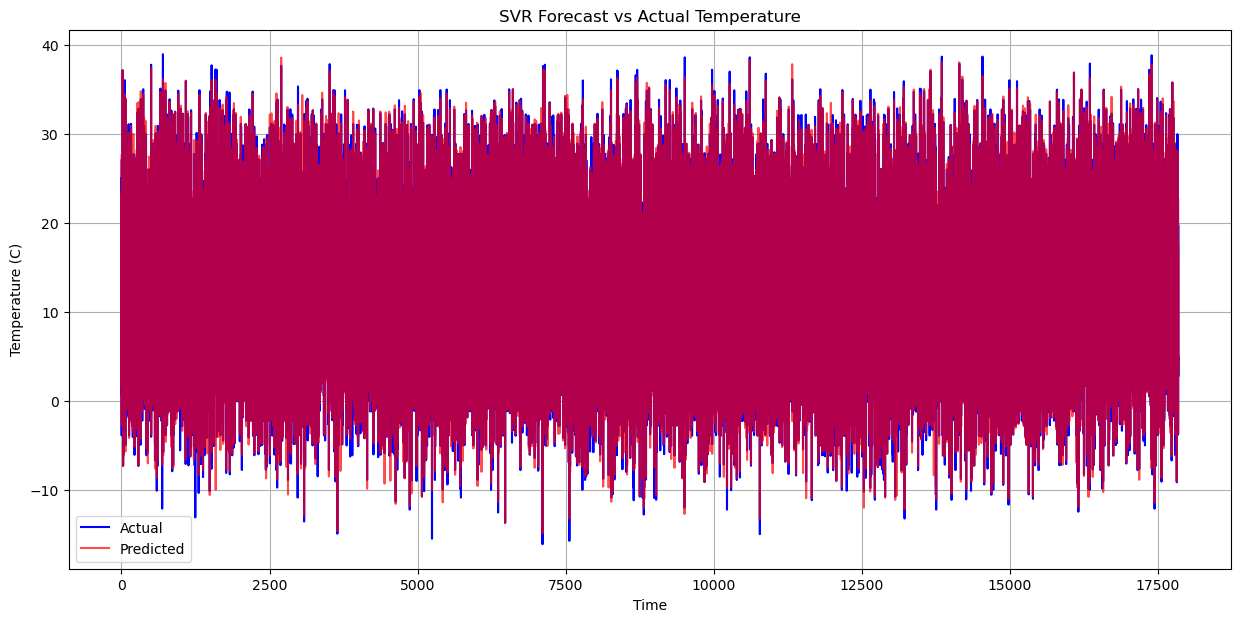

In [93]:
# Assuming y_test and y_pred are already defined from the SVR model predictions

# Creating a DataFrame for easy plotting
# Reset index to get numerical indices, which will help in plotting with the specified range
forecast_df = pd.DataFrame({'Actual': y_test.reset_index(drop=True), 
                            'Predicted': y_pred}, 
                           index=range(len(y_pred)))

# Defining the range for plotting
start_index = 0
end_index = min(80000, len(forecast_df))  # Adjust to ensure it's within the data range

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(forecast_df['Actual'][start_index:end_index], label='Actual', color='blue')
plt.plot(forecast_df['Predicted'][start_index:end_index], label='Predicted', color='red', alpha=0.7)

# Formatting the plot
plt.title('SVR Forecast vs Actual Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid(True)
plt.show()


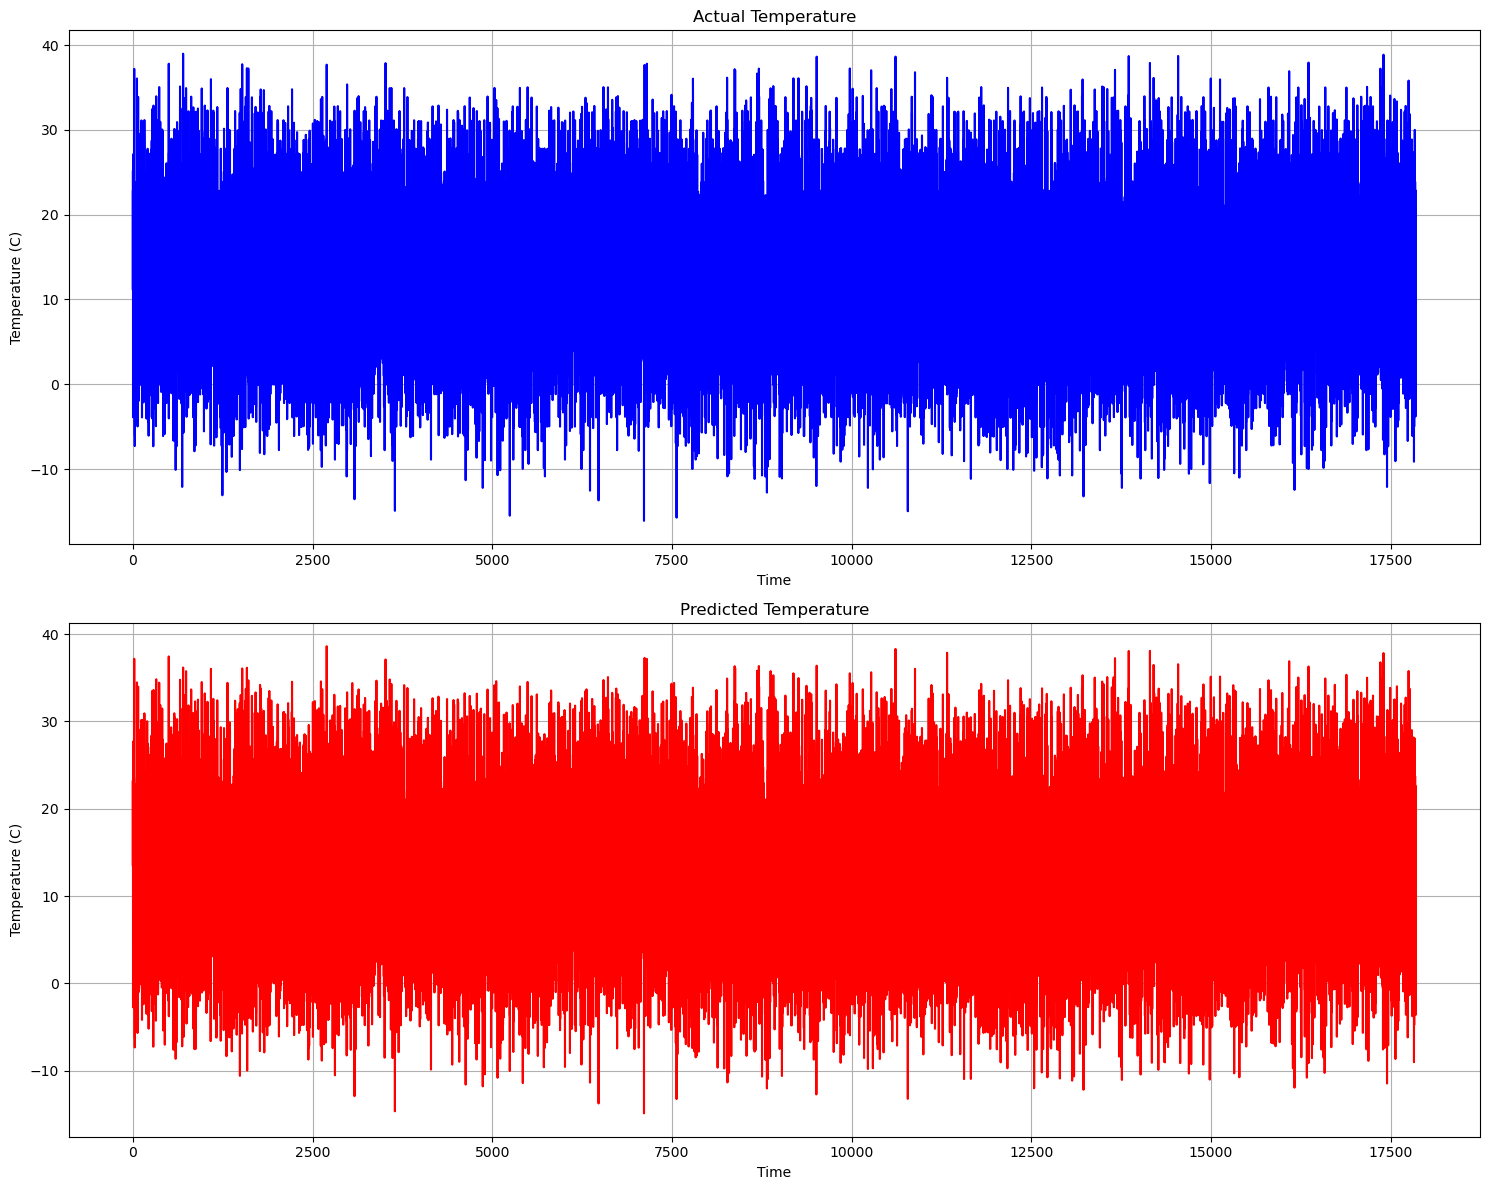

In [94]:
 import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the SVR model predictions

# Creating a DataFrame for easy plotting
# Reset index to get numerical indices
forecast_df = pd.DataFrame({'Actual': y_test.reset_index(drop=True), 
                            'Predicted': y_pred}, 
                           index=range(len(y_pred)))

# Defining the range for plotting
start_index = 0
end_index = min(80000, len(forecast_df))  # Adjust to ensure it's within the data range

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Plotting Actual Temperature
axs[0].plot(forecast_df['Actual'][start_index:end_index], color='blue')
axs[0].set_title('Actual Temperature')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Temperature (C)')
axs[0].grid(True)

# Plotting Predicted Temperature
axs[1].plot(forecast_df['Predicted'][start_index:end_index], color='red')
axs[1].set_title('Predicted Temperature')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Temperature (C)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


**Gradient Boosting Algorithm**

In [96]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [97]:
# Assuming 'Temperature (C)' is the target variable
def create_lagged_features(df, column, n_lags):
    for lag in range(1, n_lags + 1):
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    return df

In [98]:
# Number of lagged features
n_lags = 5  # Adjust this based on your dataset
temperature_df = create_lagged_features(data_cleaned, 'Temperature (C)', n_lags)
temperature_df.dropna(inplace=True)

C:\Users\ssoha\AppData\Local\Temp\ipykernel_24780\2770251627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_lag_{lag}'] = df[column].shift(lag)
C:\Users\ssoha\AppData\Local\Temp\ipykernel_24780\2560795831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_df.dropna(inplace=True)


In [99]:
# Splitting the dataset
X = temperature_df[[f'Temperature (C)_lag_{i}' for i in range(1, n_lags + 1)]]
y = temperature_df['Temperature (C)']

In [100]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [102]:
# Predicting
y_pred = xgb_model.predict(X_test)

In [103]:
# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [104]:
# Print metrics
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')


MSE: 2.019801246570357, MAE: 0.8802359814118562, R^2: 0.9773545555144332


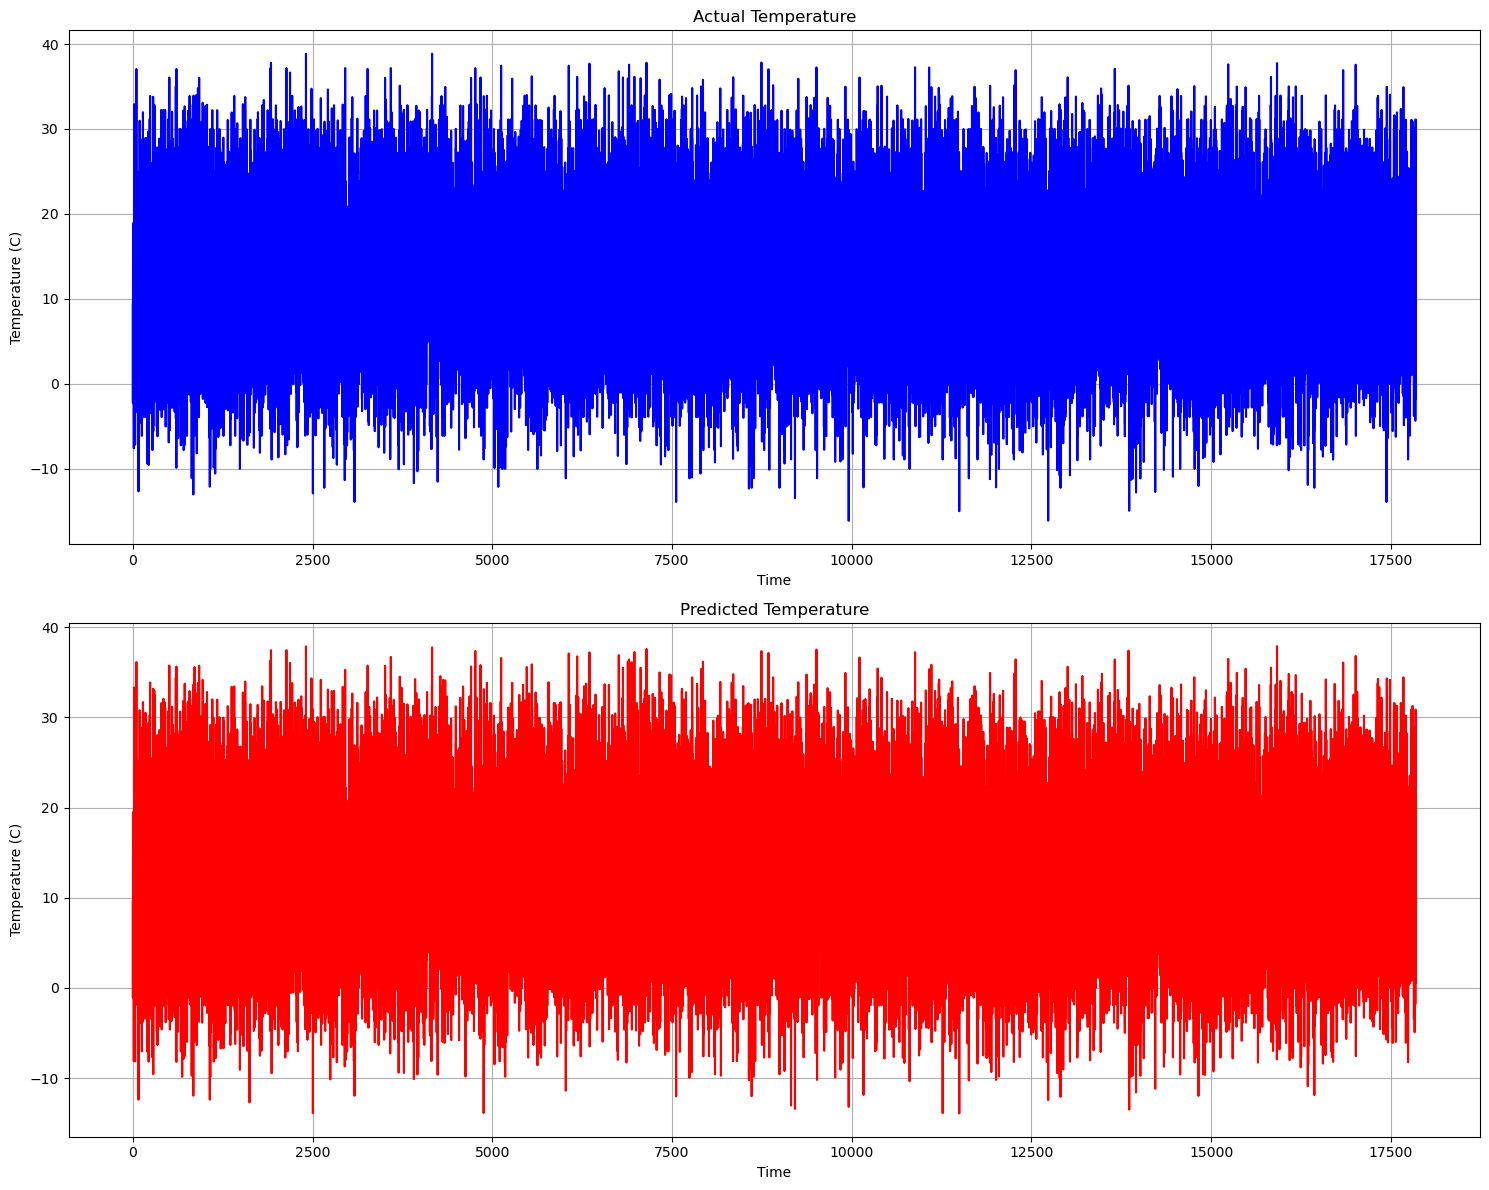

In [106]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the XGBoost model predictions

# Resetting index to get a numerical index for 'Time'
forecast_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': pd.Series(y_pred, index=y_test.index).reset_index(drop=True)
})

# Define the range for plotting
end_index = min(80000, len(forecast_df))  # Adjust to ensure it's within the data range

# Creating subplots for Actual and Predicted Temperature
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Plotting Actual Temperature
axs[0].plot(forecast_df['Actual'][:end_index], color='blue')
axs[0].set_title('Actual Temperature')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Temperature (C)')
axs[0].grid(True)

# Plotting Predicted Temperature
axs[1].plot(forecast_df['Predicted'][:end_index], color='red')
axs[1].set_title('Predicted Temperature')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Temperature (C)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


**VectorAutoRegressor**

In [132]:

import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [133]:
# Selecting multiple time-dependent variables
selected_data = data_cleaned[['Temperature (C)', 'Humidity']]  # Adjust this based on your dataset


In [134]:
# Function to check stationarity
def check_stationarity(series):
    p_value = adfuller(series)[1]
    return p_value < 0.05  # Assuming 5% level for stationarity


In [135]:
# Make series stationary if needed (using differencing)
for column in selected_data.columns:
    if not check_stationarity(selected_data[column]):
        selected_data[column] = selected_data[column].diff().dropna()

# Dropping any NaNs that were created by differencing
selected_data.dropna(inplace=True)


C:\Users\ssoha\AppData\Local\Temp\ipykernel_24780\2158610505.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.dropna(inplace=True)


In [136]:
# Splitting the data into training and test sets
n_obs = 10  # Change this based on your test set size
train, test = selected_data[:-n_obs], selected_data[-n_obs:]


In [137]:
# Finding the optimal lag order
model = VAR(train)
for i in range(1, 20):  # You can adjust the range based on your dataset
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print()


C:\Users\ssoha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ssoha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  -5.166805745399185
BIC :  -5.166173721081657

Lag Order = 2
AIC :  -5.330301102744494
BIC :  -5.329247718332336

Lag Order = 3
AIC :  -5.396370830108696
BIC :  -5.394896077161909

Lag Order = 4
AIC :  -5.41170541554311
BIC :  -5.409809285621428

Lag Order = 5
AIC :  -5.4131692621644625
BIC :  -5.410851746827351

Lag Order = 6
AIC :  -5.4139633142128245
BIC :  -5.411224405019485

Lag Order = 7
AIC :  -5.415069481375154
BIC :  -5.411909169884518

Lag Order = 8
AIC :  -5.4160064462137045
BIC :  -5.412424723984437

Lag Order = 9
AIC :  -5.418533187642848
BIC :  -5.41453004623335

Lag Order = 10
AIC :  -5.4227755380786204
BIC :  -5.4183509690470215

Lag Order = 11
AIC :  -5.433529841648749
BIC :  -5.428683836552915

Lag Order = 12
AIC :  -5.44721406781778
BIC :  -5.441946618215309

Lag Order = 13
AIC :  -5.463034949063981
BIC :  -5.457346046512204

Lag Order = 14
AIC :  -5.477629415395914
BIC :  -5.471519051451896

Lag Order = 15
AIC :  -5.487910572038763
BIC :  -5.4813

In [138]:
# Fit the model with the selected lag order
selected_lag_order = 5  # Replace with the lag order of your choice based on AIC/BIC
model_fit = model.fit(selected_lag_order)


In [139]:
# Forecasting
forecast = model_fit.forecast(train.values[-selected_lag_order:], steps=n_obs)


In [140]:
# Evaluate the model
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f'MSE: {mse}, MAE: {mae}')


MSE: 1.5198414387589112, MAE: 0.7053920328321356


In [141]:
# Calculate R2 score for each variable
for i in range(test.shape[1]):
    r2 = r2_score(test.iloc[:, i], forecast[:, i])
    print(f'R2 Score for {test.columns[i]}: {r2}')


R2 Score for Temperature (C): 0.8211170251727551
R2 Score for Humidity: 0.8848300757670156


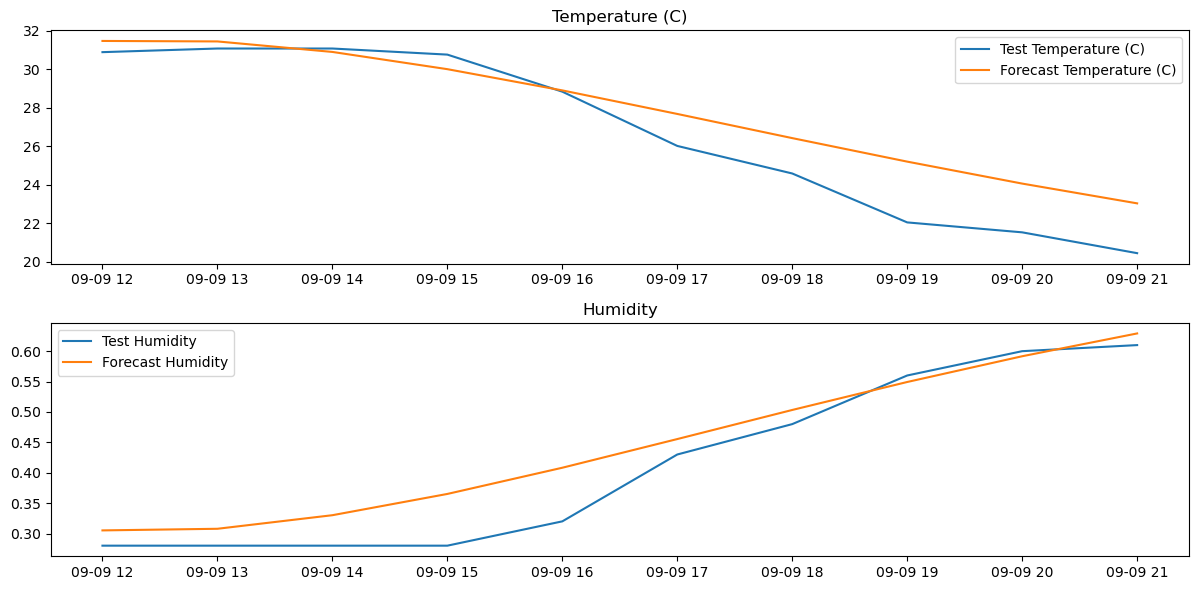

In [142]:
# Plotting the results
plt.figure(figsize=(12, 6))
for i, col in enumerate(selected_data.columns):
    plt.subplot(len(selected_data.columns), 1, i+1)
    plt.plot(test.index, test[col], label='Test ' + col)
    plt.plot(test.index, forecast[:, i], label='Forecast ' + col)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()